In [1]:
!unzip '/content/drive/MyDrive/Machine Learning ITHUB/ДИ 2023/lessons/data/dog-breed-identification-data.zip'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  in

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
image_dir = '/content/train'
labels_path = '/content/labels.csv'

In [4]:
labels_df = pd.read_csv(labels_path)
breed_labels = labels_df['breed']
num_classes = breed_labels.nunique()

In [5]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
train_df, valid_df = train_test_split(labels_df, test_size=0.2, random_state=42)
train_df['id'] = train_df['id'].astype(str) + '.jpg'
valid_df['id'] = valid_df['id'].astype(str) + '.jpg'

In [7]:
#аугментация
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [8]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                 directory=image_dir,
                                                 x_col="id",
                                                 y_col="breed",
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 8177 validated image filenames belonging to 120 classes.


In [9]:
train_generator

In [10]:
labels_df['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

Популярные предобученные модели - https://vc.ru/u/1389654-machine-learning/678485-10-predvaritelno-obuchennyh-modeley-dlya-vstraivaniya-izobrazheniy-kotorye-dolzhen-znat-kazhdyy-specialist-po-dannym

О InceptionV3 - https://iq.opengenus.org/inception-v3-model-architecture/

In [11]:
#предобученная модель
base_model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [12]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_generator, epochs=10)

Epoch 1/10
256/256 [==============================] - 114s 265ms/step - loss: 4.3578 - accuracy: 0.0810
Epoch 2/10
256/256 [==============================] - 60s 234ms/step - loss: 2.9279 - accuracy: 0.2968
Epoch 3/10
256/256 [==============================] - 63s 246ms/step - loss: 2.1073 - accuracy: 0.4472
Epoch 4/10
256/256 [==============================] - 66s 258ms/step - loss: 1.6142 - accuracy: 0.5605
Epoch 5/10
256/256 [==============================] - 60s 235ms/step - loss: 1.2531 - accuracy: 0.6534
Epoch 6/10
256/256 [==============================] - 62s 244ms/step - loss: 0.9625 - accuracy: 0.7330
Epoch 7/10
256/256 [==============================] - 63s 247ms/step - loss: 0.7535 - accuracy: 0.7853
Epoch 8/10
256/256 [==============================] - 59s 231ms/step - loss: 0.5784 - accuracy: 0.8336
Epoch 9/10
256/256 [==============================] - 63s 245ms/step - loss: 0.4814 - accuracy: 0.8614
Epoch 10/10
256/256 [==============================] - 63s 248ms/step - 

In [16]:
model.save('/content/drive/MyDrive/ML/dog_breed_classifier.h5')

1/1 [==============================] - 2s 2s/step


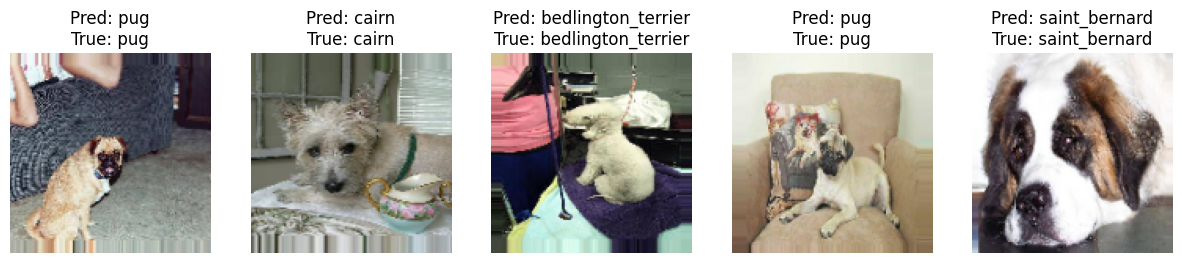

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model

def plot_images_with_predictions(model, datagen, num_images=5):
    for batch in datagen:
        images, labels = batch
        break

    predictions = model.predict(images)

    class_labels = list(datagen.class_indices.keys())
    decoded_labels = [class_labels[np.argmax(pred)] for pred in predictions]

    plt.figure(figsize=(15, 7))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Pred: {decoded_labels[i]}\nTrue: {class_labels[np.argmax(labels[i])]}')
        plt.axis('off')
    plt.show()


model =  load_model('dog_breed_classifier.h5')

# Plot images with predictions
plot_images_with_predictions(model,train_generator)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

In [ ]:
img = load_img('/content/Depositphotos_5202035_l-2015_1583840326-e1583840349869.jpg',target_size=(128,128))
img_arr = img_to_array(img)
img_arr = img_arr/255
arr = np.array([img_arr])
arr.shape

(1, 128, 128, 3)

In [ ]:
preds = model.predict(arr)

1/1 [==============================] - 0s 49ms/step


In [ ]:
class_labels = list(train_generator.class_indices.keys())
decoded_labels = [class_labels[np.argmax(pred)] for pred in preds]
decoded_labels

['dingo']

In [21]:
class_labels = list(train_generator.class_indices.keys())
df_classes = pd.DataFrame(columns=['breed'])
df_classes['breed']=class_labels
df_classes.to_csv('breed.csv',index=False)